In [1]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [8]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\3rd informal\figure 1 and 2.xlsx")
print(batch)

         Gi_1     U1_in  Unnamed: 2  Unnamed: 3    Gi_1.1     U2_in  \
0    0.170086  0.014066         NaN         NaN  0.170086  0.056971   
1    0.168330  0.041056         NaN         NaN  0.168330  0.039239   
2    0.092686  0.030286         NaN         NaN  0.092686  0.205229   
3    0.090473  0.029560         NaN         NaN  0.090473  0.119618   
4    0.049889  0.012339         NaN         NaN  0.052054  0.058278   
..        ...       ...         ...         ...       ...       ...   
185       NaN       NaN         NaN         NaN       NaN       NaN   
186       NaN       NaN         NaN         NaN       NaN       NaN   
187       NaN       NaN         NaN         NaN       NaN       NaN   
188       NaN       NaN         NaN         NaN       NaN       NaN   
189       NaN       NaN         NaN         NaN       NaN       NaN   

     Unnamed: 6  Unnamed: 7  Gi_1.2      Gs_2  ...       U_1       U_2  \
0           NaN         NaN   0.001  0.094993  ...  0.006584  0.046577   

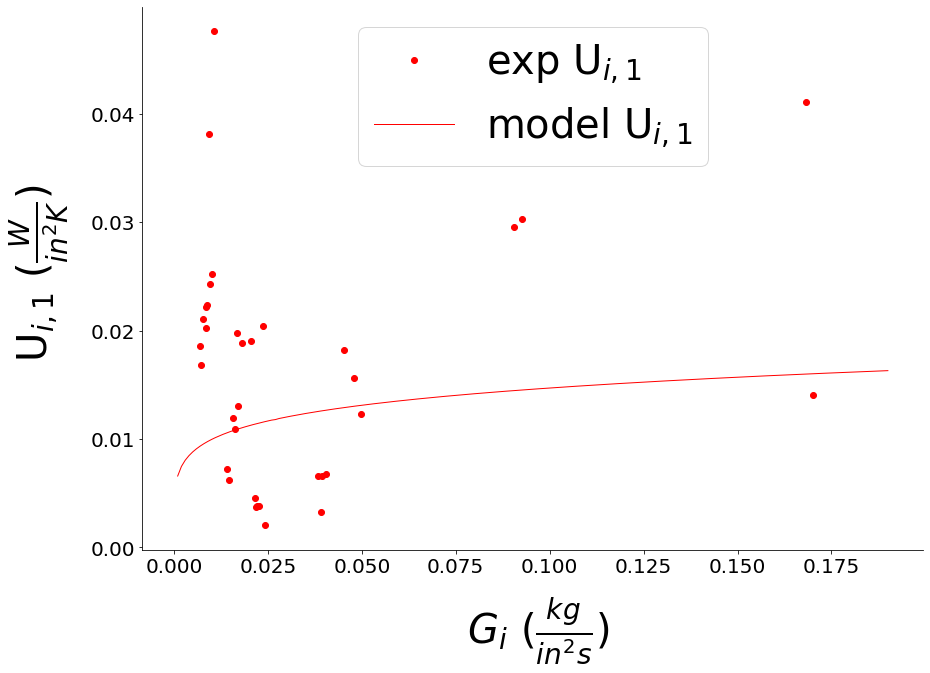

In [37]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
#total flux at permeate
n = 1
lw = 1
lw1 = 6
k1 = 0.026658
k2 = 0.047736
k3 = 0.0383528

ax1.plot(batch["Gi_1"],batch["U1_in"],'ro', markersize = lw1,label = "exp U$_{i,1}$")
#ax1.plot(batch[""]/60,batch["T_water.1"],'bo', markersize = lw1,label = "low speed $_{exp}$")
#ax1.plot(batch["time(s).2"]/60,batch["T_water.2"],'ko', markersize = lw1,label = "high speed $_{exp}$")

ax1.plot(batch["Gi_1.2"],batch["U_1"],'r-', linewidth = lw,label = "model U$_{i,1}$")
#ax1.plot(batch["time(s).1"]/60,batch["T_model.1"],'b-', linewidth = lw,label = "low speed $_{model}$")
#ax1.plot(batch["time(s).2"]/60,batch["T_model.2"],'k-', linewidth = lw,label = "high speed $_{model}$")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 1, loc = 'upper center', fontsize = 40)
ax1.set_ylabel(r" U$_{i,1}$ ($\frac{W} {in^2 K}$)", fontsize = 40,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r" $G_i$ ($\frac{kg} {in^2 s}$)",fontsize = 40,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

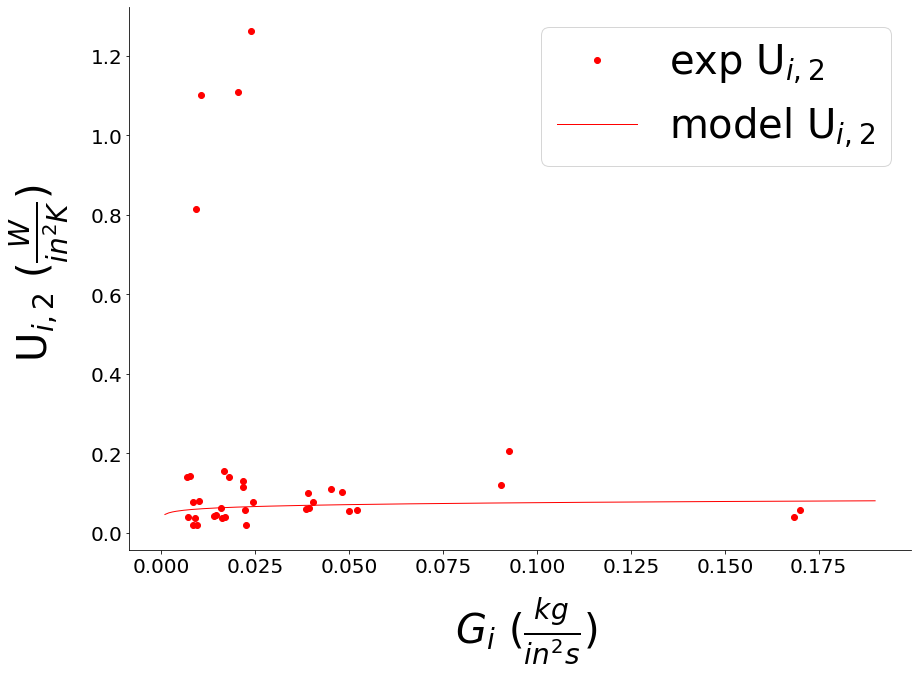

In [38]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
#total flux at permeate
n = 1
lw = 1
lw1 = 6
k1 = 0.026658
k2 = 0.047736
k3 = 0.0383528

ax1.plot(batch["Gi_1.1"],batch["U2_in"],'ro', markersize = lw1,label = "exp U$_{i,2}$")
#ax1.plot(batch[""]/60,batch["T_water.1"],'bo', markersize = lw1,label = "low speed $_{exp}$")
#ax1.plot(batch["time(s).2"]/60,batch["T_water.2"],'ko', markersize = lw1,label = "high speed $_{exp}$")

ax1.plot(batch["Gi_1.2"],batch["U_2"],'r-', linewidth = lw,label = "model U$_{i,2}$")
#ax1.plot(batch["time(s).1"]/60,batch["T_model.1"],'b-', linewidth = lw,label = "low speed $_{model}$")
#ax1.plot(batch["time(s).2"]/60,batch["T_model.2"],'k-', linewidth = lw,label = "high speed $_{model}$")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 1, loc = 'best', fontsize = 40)
ax1.set_ylabel(r" U$_{i,2}$ ($\frac{W} {in^2 K}$)", fontsize = 40,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r" $G_i$ ($\frac{kg} {in^2 s}$)",fontsize = 40,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax1.set_ylim(0,0.22)
#ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')